<a href="https://colab.research.google.com/github/miftahcoiri354/bangkit-final-project/blob/master/Final_Notebook_(Tested)_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Colab Library to upload files to notebook
from google.colab import files
files.upload() #upload kaggle.json (You can get the files from Kaggle API Token at My Account)

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"miftahcoiri","key":"490608e5f81f31b67f3791509039e77c"}'}

In [30]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [31]:
!kaggle kernels list — user miftahcoiri — sort-by dateRun
!kaggle datasets download -d datamunge/sign-language-mnist

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: — user miftahcoiri — sort-by dateRun
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
from zipfile import ZipFile

z = ZipFile('sign-language-mnist.zip')
zip_files = z.infolist()

zip_files

[<ZipInfo filename='amer_sign2.png' compress_type=deflate file_size=487452 compress_size=486808>,
 <ZipInfo filename='amer_sign3.png' compress_type=deflate file_size=44527 compress_size=42724>,
 <ZipInfo filename='american_sign_language.PNG' compress_type=deflate file_size=208007 compress_size=207142>,
 <ZipInfo filename='sign_mnist_test.csv' compress_type=deflate file_size=21777485 compress_size=6687945>,
 <ZipInfo filename='sign_mnist_test/sign_mnist_test.csv' compress_type=deflate file_size=21777485 compress_size=6687945>,
 <ZipInfo filename='sign_mnist_train.csv' compress_type=deflate file_size=83281065 compress_size=25759739>,
 <ZipInfo filename='sign_mnist_train/sign_mnist_train.csv' compress_type=deflate file_size=83281065 compress_size=25759739>]

In [33]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#**Dataset Preparateion**

In [35]:
#Import the test and train datasets into pandas dataframe
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')
test_df

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0         6     149     149     150  ...       106       112       120       107
1         5     126     128     131  ...       184       184       182       180
2        10      85      88      92  ...       226       225       224       222
3         0     203     205     207  ...       230       240       253       255
4         3     188     191     193  ...        49        46        46        53
...     ...     ...     ...     ...  ...       ...       ...       ...       ...
7167      1     135     119     108  ...       184       176       167       163
7168     12     157     159     161  ...       210       210       209       208
7169      2     190     191     190  ...       210       211       209       208
7170      4     201     205     208  ...        91        67        70        63
7171      2     173     174     173  ...       195       195       193       192

[7172 rows x 785 columns]

In [36]:
old_labels_train = train_df['label']
old_labels_test = test_df['label']

In [37]:
labels = []
z = 0
y = 10

for i in old_labels_train:
  if z == i:
    labels.append(i)
    z = z+1

for i in old_labels_train:
  if y == i:
    labels.append(i)
    y = y+1

In [38]:
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [39]:
n = labels
def spelli(n):
    n = str(n)
    num = labels
    spell = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
    res = ''
    l = len(n)
    if int(n) in num:
        res = spell[num.index(int(n))]
        return (res)
    elif len(n)==1:
        res = spell[n]
        return (res)
    elif len(n)==2:
        m = n[0]
        m += '0'
        m = int(m)
        res = spell[num.index(m)]+' '
        res += spelli(int(n[1]))
        return (res)

In [40]:
fin_labels = []
for i in labels:
  n = i
  result = ""
  n = str(n)[::-1]
  arr = [n[i:i+3][::-1] for i in range(0, len(n), 3)]
  jrr = arr[::-1]
  for e in jrr:
    result+= spelli(int(e))
    result+=""
  #print (result)
  fin_labels.append(result)

In [41]:
fin_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [42]:
x_train = train_df.iloc[:, 1:]
x_test = test_df.iloc[:, 1:]
y_train = train_df['label']
y_test = test_df['label']

In [43]:
final_labels = '\n'.join(fin_labels)

with open('labels.txt', 'w') as f:
  f.write(final_labels)

In [44]:
x_train

pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         107     118     127     134  ...       206       204       203       202
1         155     157     156     156  ...       175       103       135       149
2         187     188     188     187  ...       198       195       194       195
3         211     211     212     212  ...       225       222       229       163
4         164     167     170     172  ...       157       163       164       179
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27450     189     189     190     190  ...       234       200       222       225
27451     151     154     157     158  ...       195       195       195       194
27452     174     174     174     174  ...       203       202       200       200
27453     177     181     184     185  ...        47        64        87        93
27454     179     180     180     180  ...       197       205       209       215

[27455 rows x 784 columns]

#**Dataset Transformation**

In [45]:
x_train_resize = x_train/255
x_test_resize = x_test/255
x_train_resize = x_train_resize.values
x_test_resize = x_test_resize.values

In [46]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train_resize = x_train_resize.reshape(-1,28,28,1)
x_test_resize = x_test_resize.reshape(-1,28,28,1)
x_train_resize.shape

(27455, 28, 28, 1)

In [47]:
y_train_preprocessing = preprocessing.LabelBinarizer()
y_test_preprocessing = preprocessing.LabelBinarizer()
y_train_resize = y_train_preprocessing.fit_transform(y_train)
y_test_resize = y_test_preprocessing.fit_transform(y_test)
y_train_resize.shape

(27455, 24)

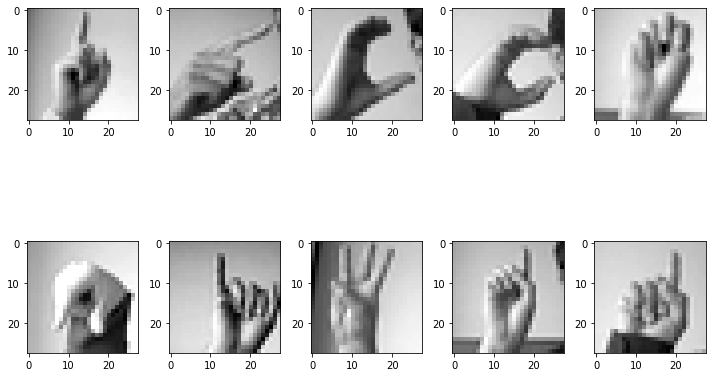

In [48]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train_resize[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [49]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#**Build & Train Model**

In [50]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(75, (3,3), 
                         strides = 1,
                         padding = 'same',
                         activation='relu',
                         input_shape = (28,28,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2),
                            strides = 2,
                            padding = 'same'),
  tf.keras.layers.Conv2D(50, (3,3),
                         strides=1,
                         padding = 'same',
                         activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2),
                            strides = 2,
                            padding = 'same'),
  tf.keras.layers.Conv2D(25, (3,3),
                         strides = 1,
                         padding = 'same',
                         activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2),
                            strides=2,
                            padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512,
                        activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=24,
                        activation = 'softmax')
])

In [51]:
model.compile(optimizer = 'adam' , 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [52]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [53]:
history = model.fit(datagen.flow(x_train_resize,y_train_resize, batch_size = 128),
                    epochs = 25 , validation_data = (x_test_resize, y_test_resize),
                    callbacks = [learning_rate_reduction])

Epoch 1/25
215/215 [==============================] - 12s 58ms/step - loss: 1.1176 - accuracy: 0.6518 - val_loss: 4.1658 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 2/25
215/215 [==============================] - 13s 59ms/step - loss: 0.2249 - accuracy: 0.9270 - val_loss: 1.7376 - val_accuracy: 0.4852 - lr: 0.0010
Epoch 3/25
215/215 [==============================] - 13s 58ms/step - loss: 0.1052 - accuracy: 0.9676 - val_loss: 0.1641 - val_accuracy: 0.9543 - lr: 0.0010
Epoch 4/25
215/215 [==============================] - 13s 58ms/step - loss: 0.0660 - accuracy: 0.9786 - val_loss: 0.1141 - val_accuracy: 0.9646 - lr: 0.0010
Epoch 5/25
215/215 [==============================] - 13s 59ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0477 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 6/25
215/215 [==============================] - 12s 58ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.2870 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 7/25
215/215 [==============================] - ETA:

In [54]:
print("Accuracy of the model is - " , model.evaluate(x_test_resize,y_test_resize)[1]*100 , "%")

225/225 [==============================] - 1s 5ms/step - loss: 8.9607e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


#**Plot the Prediction Result**

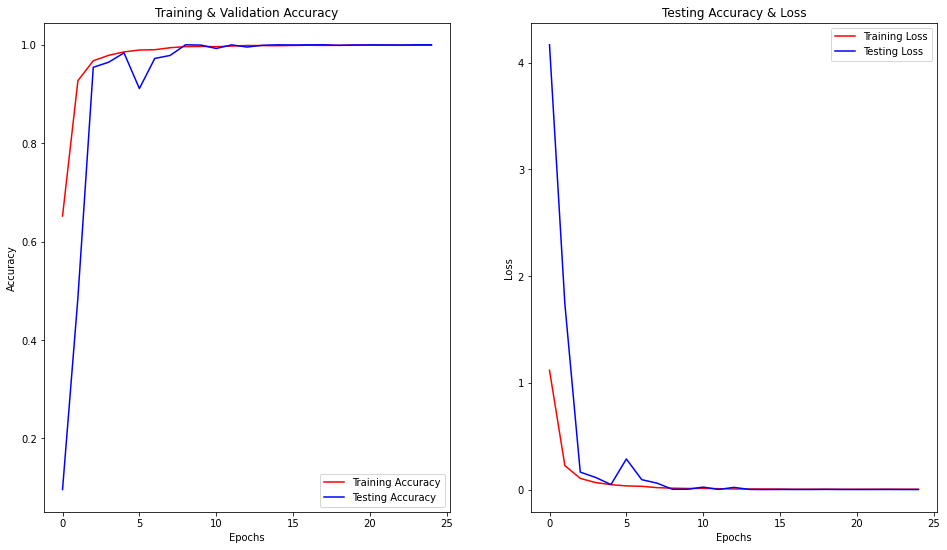

In [56]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'r-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'b-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'r-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'b-' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [57]:
predictions = model.predict_classes(x_test_resize)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

print(predictions[:100]) #prediction labels using ML
print(np.array(y_test[:100])) #original labels from dataset

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7  2  0 21  4
 10 15  2 15  7  1  7  8 13 19  3 21 13  3 18 14 15 23  8 15 14  5 17  4
 19 13 20 22 20  5 16 16 21  4  7 22 10 13 11 22  2 10  1  4 18  4 20  6
 15  4  3 20 15 11  2  2 17  2  7 21 23  7 12 17 24 14  2  1  7 23  8  5
  0  0 19 21]
[ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7  2  0 21  4
 10 15  2 15  7  1  7  8 13 19  3 21 13  3 18 14 15 23  8 15 14  5 17  4
 19 13 20 22 20  5 16 16 21  4  7 22 10 13 11 22  2 10  1  4 18  4 20  6
 15  4  3 20 15 11  2  2 17  2  7 21 23  7 12 17 24 14  2  1  7 23  8  5
  0  0 19 21]


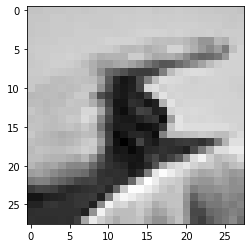

In [58]:
plt.imshow(x_test_resize[0].reshape(28,28), cmap="gray", interpolation='none')

#**Convert the Model into TFLite Model**

In [59]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [60]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

#**Interpret & Test the TFLite Model**

In [61]:
final_model = "model.tflite"
interpreter = tf.lite.Interpreter(model_path=final_model)
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: conv2d_3_input
shape: [ 1 28 28  1]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [ 1 24]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'conv2d_3_input', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([ 1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}

DUMP OUTPUT
{'name': 'Identity', 'index': 33, 'shape': array([ 1, 24], dtype=int32), 'shape_signature': array([ 1, 24], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [62]:
print("Image Input Shape:",  x_train_resize[10].shape)

Image Input Shape: (28, 28, 1)


Squeezed Image: (28, 28)


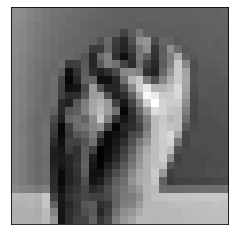

In [63]:
x_squeeze = x_train_resize.squeeze()
example_img_for_tflite = x_squeeze[10]
plt.grid(False)
plt.xticks([])
plt.yticks([])

print("Squeezed Image:", example_img_for_tflite.shape)
plt.imshow(example_img_for_tflite, cmap=plt.cm.binary)

In [64]:
train_df['label'][10]

18

In [65]:
example_img_for_tflite = example_img_for_tflite.reshape(1,28,28,1)
input_data = np.array(example_img_for_tflite, dtype=np.float32)
print("Input data shape:", input_data.shape)
print("Input data type:", input_data.dtype)

Input data shape: (1, 28, 28, 1)
Input data type: float32


In [66]:
input_details = interpreter.get_input_details()
print(interpreter.get_input_details())

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

[{'name': 'conv2d_3_input', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([ 1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [67]:
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))



Prediction results: [[7.8963940e-11 2.4120517e-15 6.8867225e-16 3.4766440e-14 5.1483295e-10
  2.1495000e-16 1.4218382e-13 2.2769835e-14 1.8357550e-08 2.9892161e-10
  4.8169984e-15 4.5147615e-08 4.0121417e-09 3.9886727e-12 5.3351925e-13
  1.9032123e-11 8.1715449e-08 9.9999976e-01 1.1982657e-12 2.2988138e-08
  6.4221809e-12 2.4364461e-16 6.6762644e-09 5.0392511e-12]]
Predicted value: 17




---
#**Try with Real Images (Optional)**


In [107]:
import PIL
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
from os import listdir
from matplotlib import image

print('Pillow Version:', PIL.__version__)

image = Image.open("IMG_20200620_204810.jpg")
data  = asarray(image)

gs_image = image.convert(mode='L')
gs_image.save("IMG_20200620_204810_gs.jpg")
image2 = Image.open("IMG_20200620_204810_gs.jpg")



print(image.format)
print(image.mode)
print(image.size)
print(data.shape)
print(data.dtype)
print(data.data)

image.show()
image2.show()


Pillow Version: 7.0.0
JPEG
RGB
(3120, 4160)
(4160, 3120, 3)
uint8


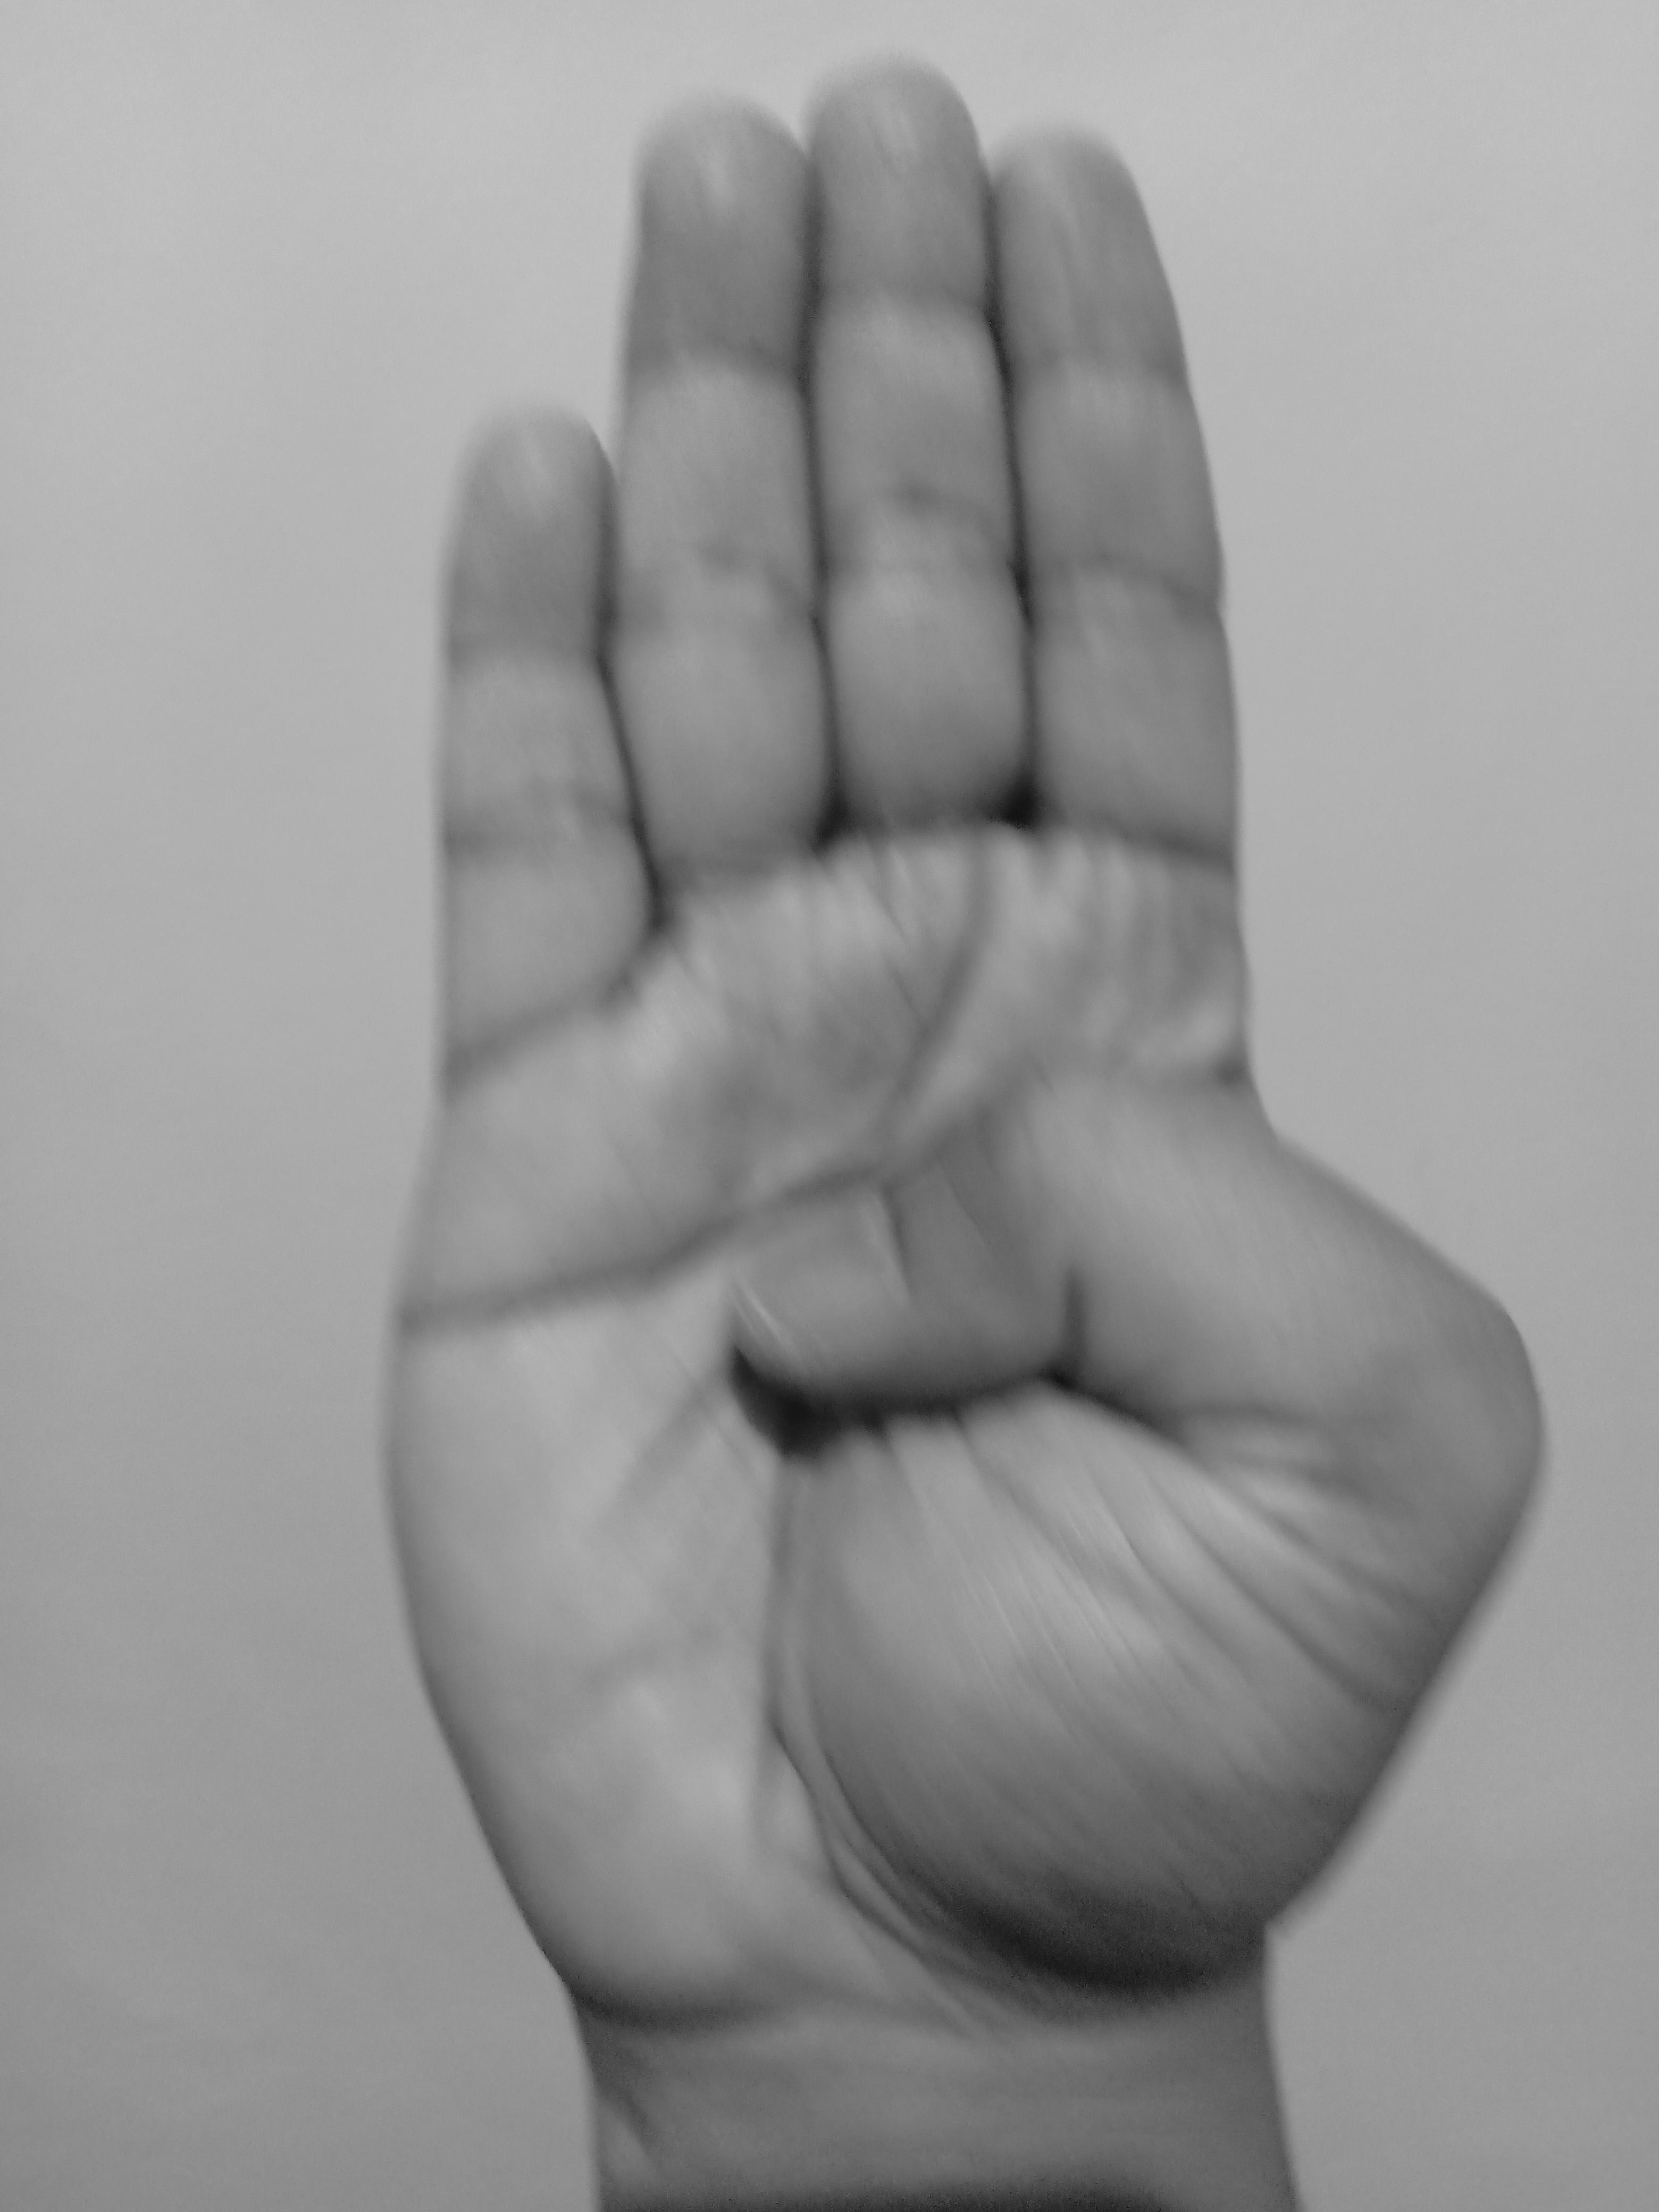

In [108]:
image2

In [109]:
img_resized = image2.resize((28,28))
print(img_resized.size)

(28, 28)


In [110]:
img_resized.size

(28, 28)

In [111]:
picc = np.array(img_resized.getdata()).reshape(img_resized.size[0], img_resized.size[1])
picc.shape

(28, 28)

In [112]:
picc = picc.reshape(1,28,28,1)
input_data2 = np.array(picc, dtype=np.float32)
print("Input data shape:", input_data2.shape)
print("Input data type:", input_data2.dtype)

Input data shape: (1, 28, 28, 1)
Input data type: float32


In [113]:
input_details = interpreter.get_input_details()
print(interpreter.get_input_details())

interpreter.set_tensor(input_details[0]['index'], input_data2)
interpreter.invoke()

[{'name': 'conv2d_3_input', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([ 1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [114]:
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))



Prediction results: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted value: 1


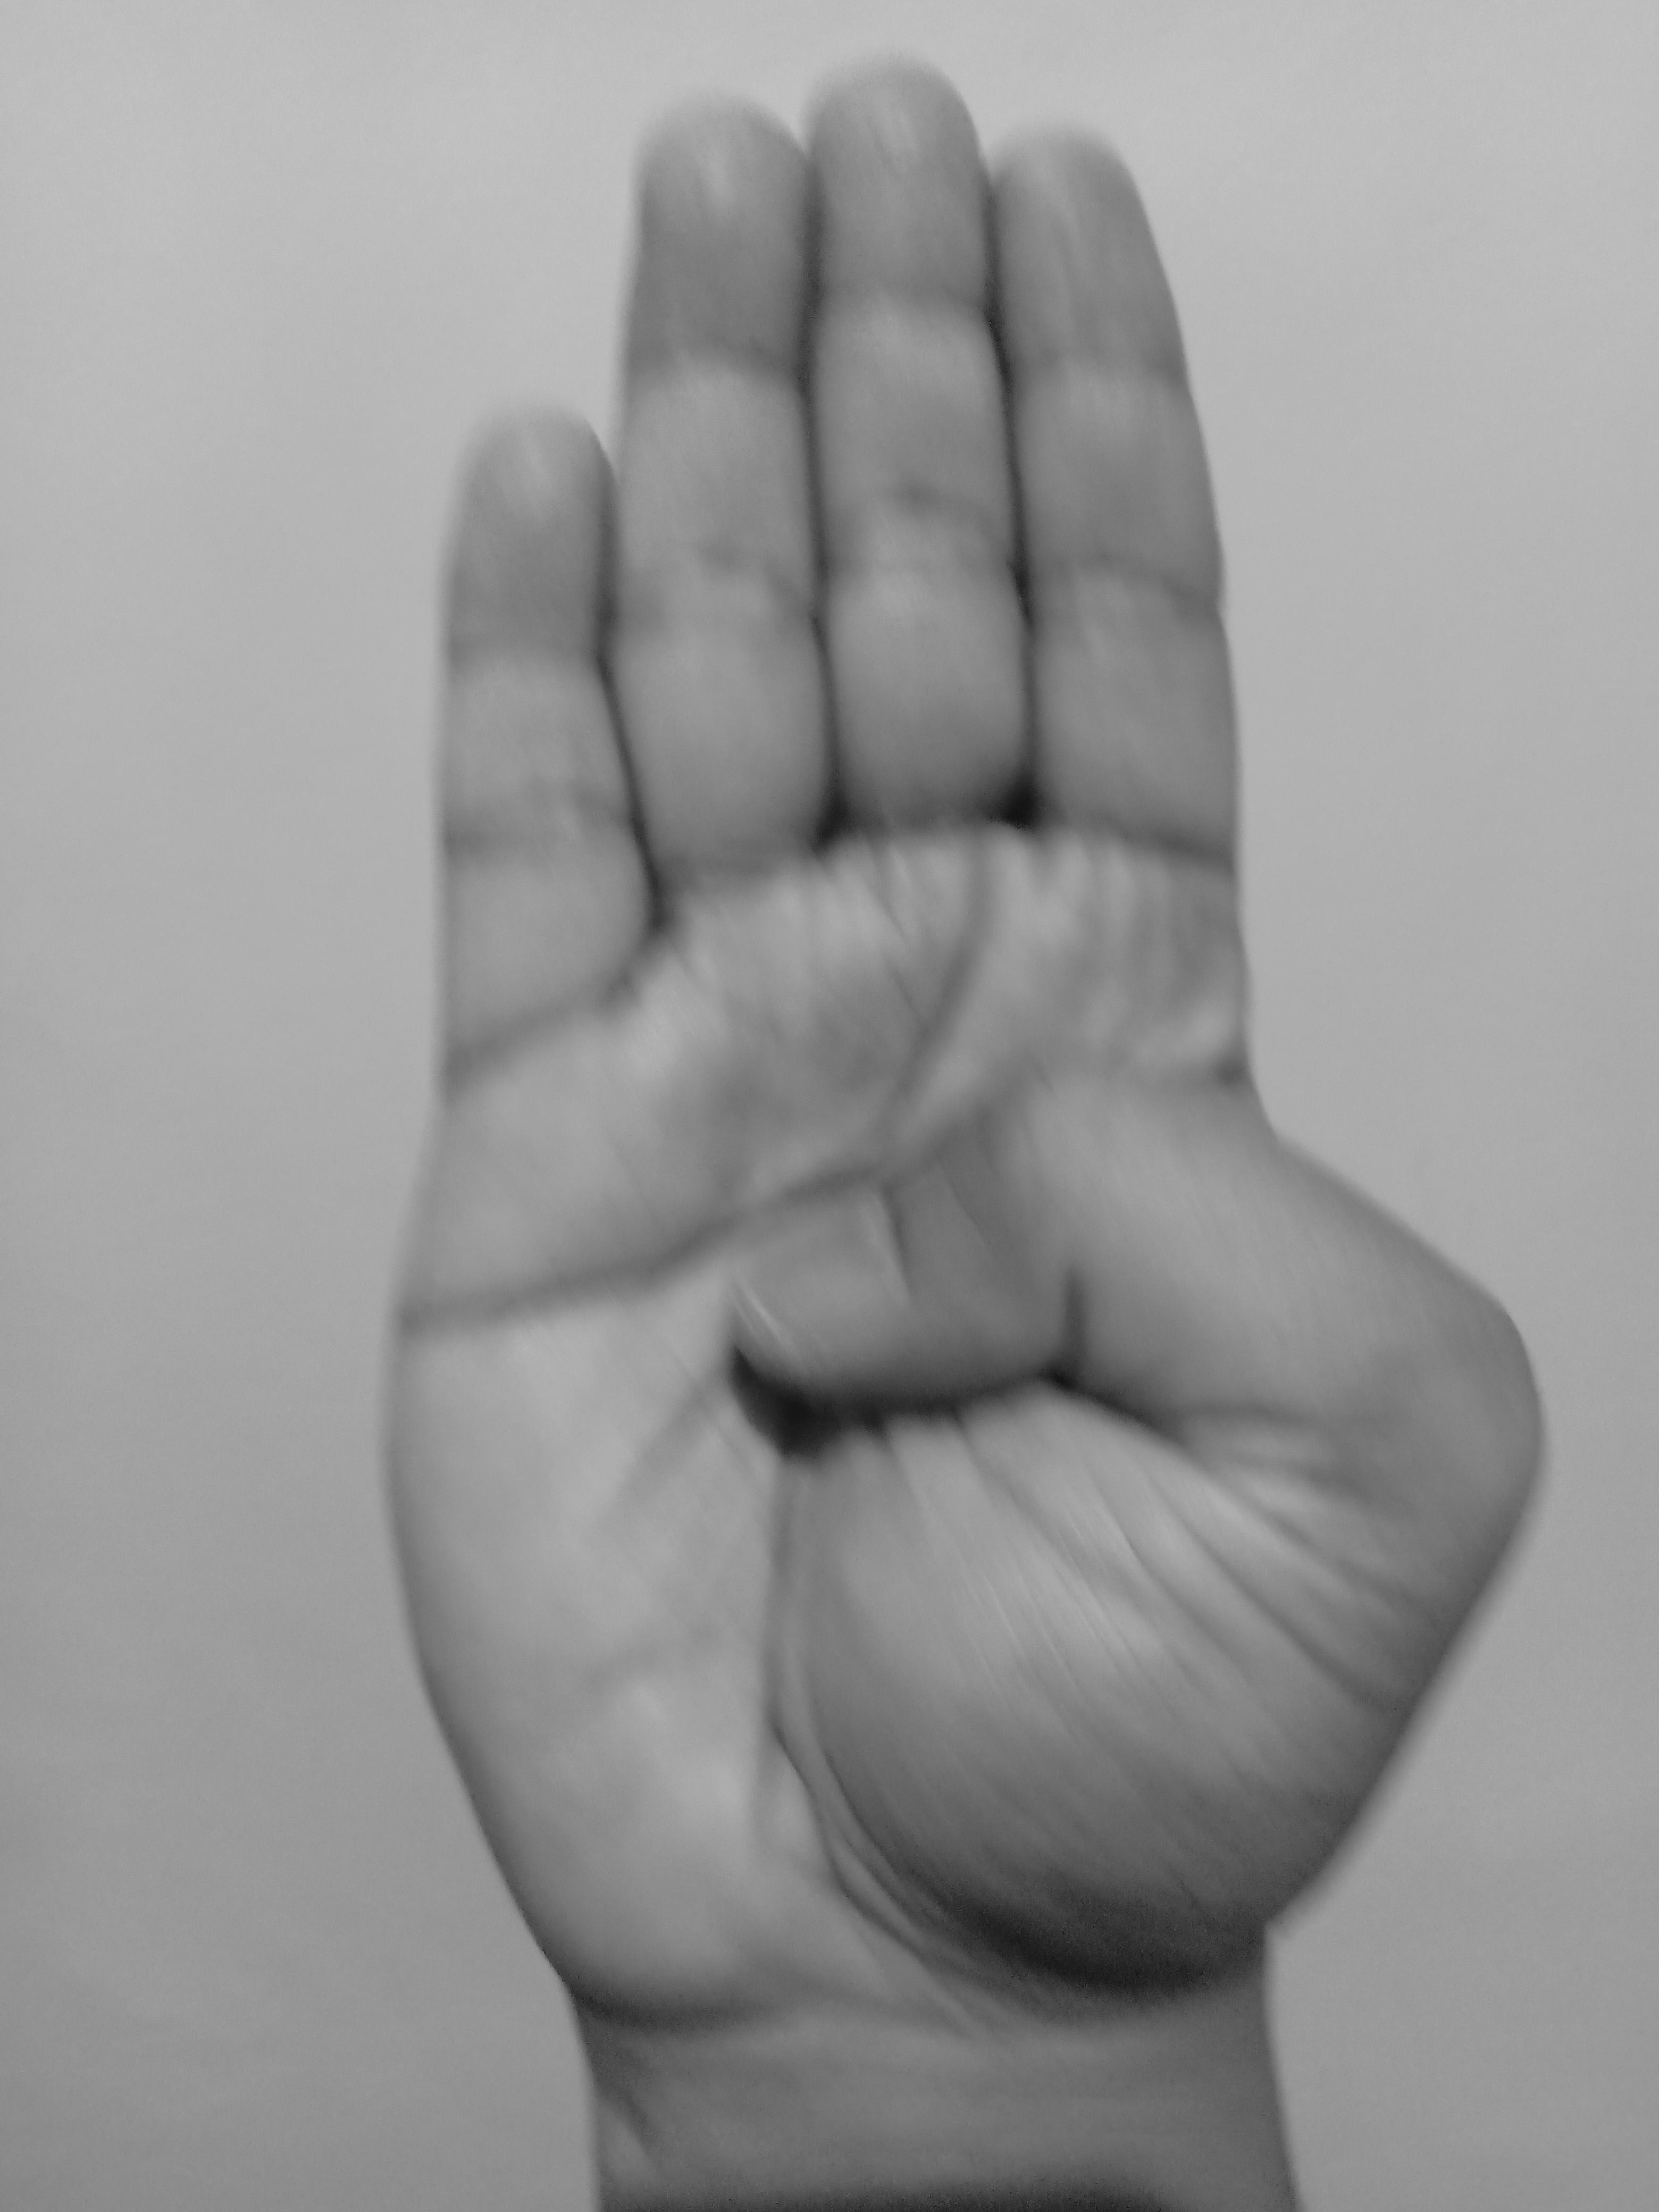

In [115]:
image2